# Visualization of the Hyperparameter Optimization results

In [7]:
import optuna
from optuna.study import StudyDirection, Study
from optuna.visualization import plot_optimization_history, plot_pareto_front, plot_param_importances, plot_parallel_coordinate, plot_contour

In [8]:
study_name = "SDE_hyper_optim"
storage_name = f"sqlite:///{study_name}.db"
study = optuna.create_study(study_name=study_name, storage=storage_name, load_if_exists=True, directions=[StudyDirection.MINIMIZE, StudyDirection.MINIMIZE])

[I 2021-09-26 11:24:56,356] Using an existing study with name 'SDE_hyper_optim' instead of creating a new one.


### Showing the first 5 out of 100 trials
`values_0` is the L1 loss

`values_1` is the Three Pixel Error

In [9]:
df = study.trials_dataframe(attrs=("number", "values", "params", "state"))
df.head()

,number,values_0,values_1,params_batch_size,params_lr,params_optimizer,params_resnet2d_inplanes_0,params_resnet2d_inplanes_1,params_resnet2d_inplanes_2,params_resnet3d_inplanes_0,params_resnet3d_inplanes_1,params_resnet3d_inplanes_2,params_weight_decay,state
0,0,10.815140,0.829650,2,0.000191,RMSprop,52,64,51,20,20,23,0.001295,COMPLETE
1,1,6.880604,0.732313,4,0.000321,Adam,32,40,39,18,27,20,0.001296,COMPLETE
2,2,19.087730,0.915218,5,0.024843,Adam,61,59,54,27,25,28,0.000006,COMPLETE
3,3,17.126258,0.841449,2,0.009404,SGD,55,53,62,27,21,27,0.000018,COMPLETE
4,4,9.307928,0.782797,4,0.022109,Adam,49,57,38,16,17,27,0.000364,COMPLETE


/tmp/ipykernel_3444/1630076580.py:1: ExperimentalWarning:

plot_pareto_front is experimental (supported from v2.4.0). The interface can change in the future.



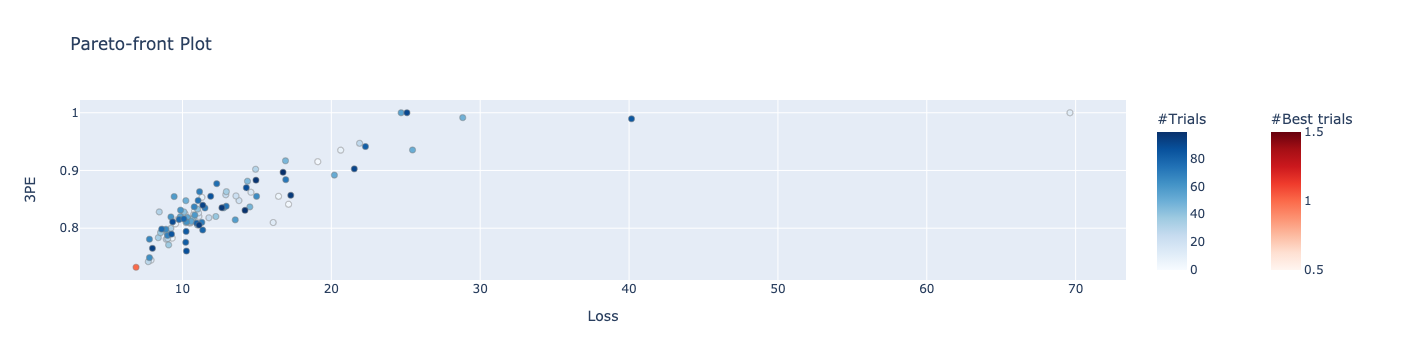

In [10]:
plot_pareto_front(study, target_names=["Loss", "3PE"])

In [11]:
loss_plot_kwargs = {
    'target': lambda t: t.values[0],
    'target_name': 'Loss'
}
three_pe_plot_kwargs = {
    'target': lambda t: t.values[1],
    'target_name': '3PE'
}

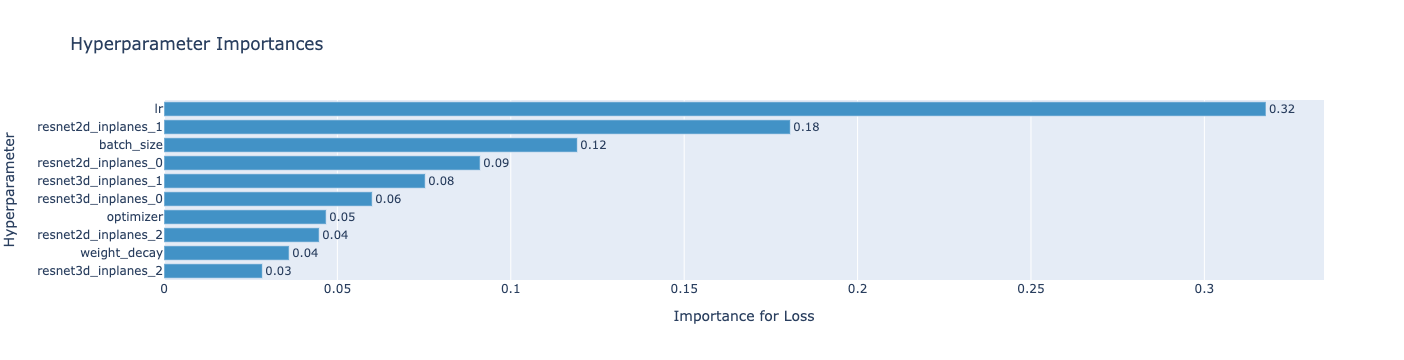

In [19]:
plot_param_importances(study, **loss_plot_kwargs)

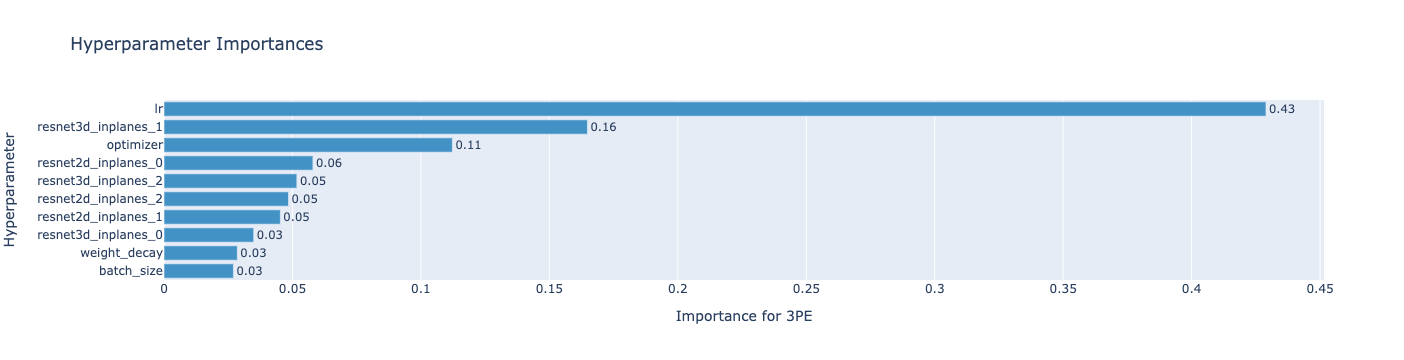

In [22]:
plot_param_importances(study, **three_pe_plot_kwargs)

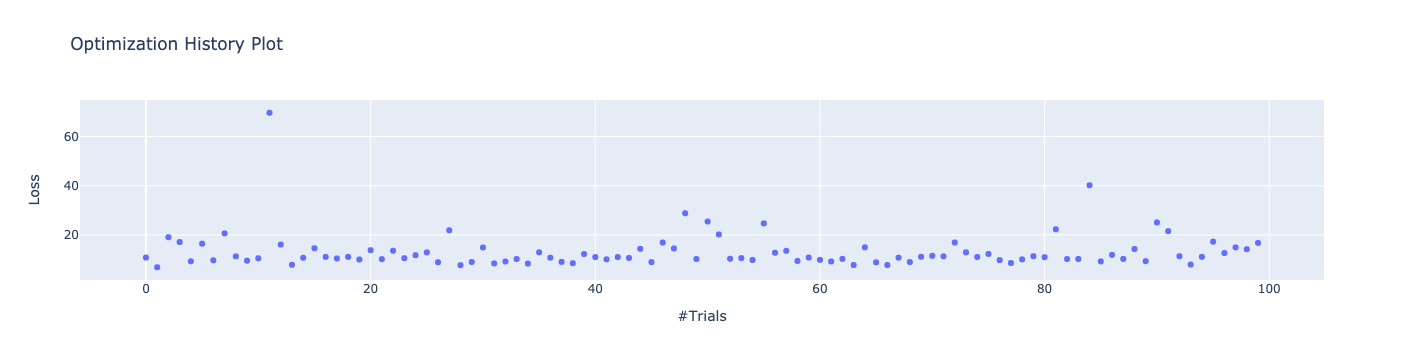

In [23]:
plot_optimization_history(study, **loss_plot_kwargs)

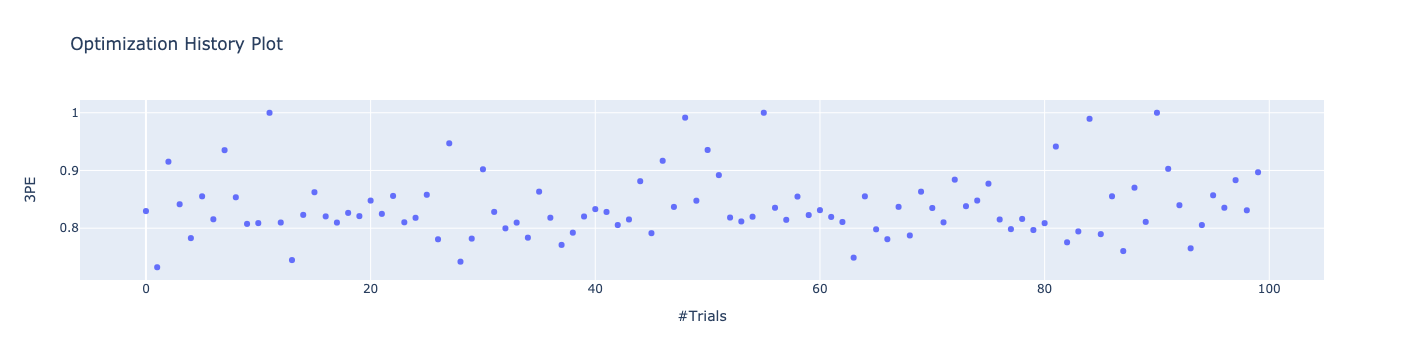

In [24]:
plot_optimization_history(study, **three_pe_plot_kwargs)

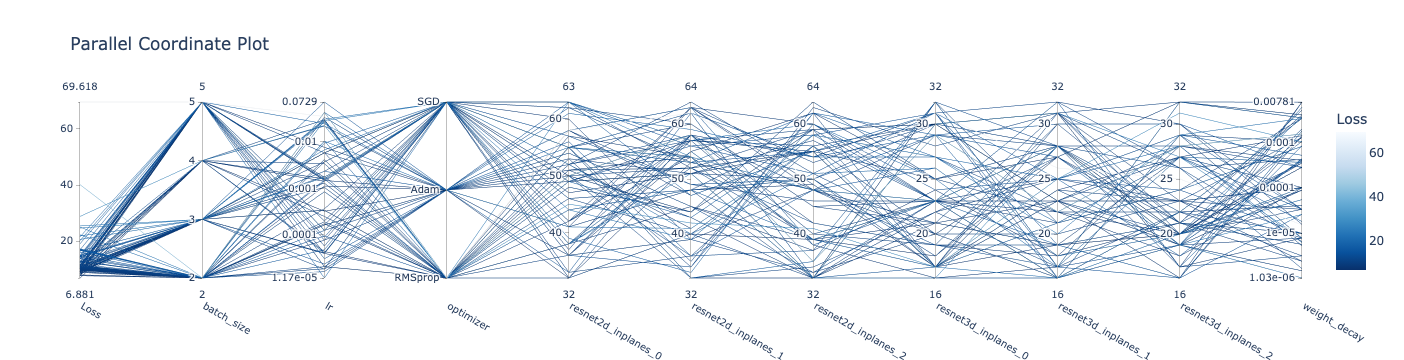

In [33]:
plot_parallel_coordinate(study, **loss_plot_kwargs)

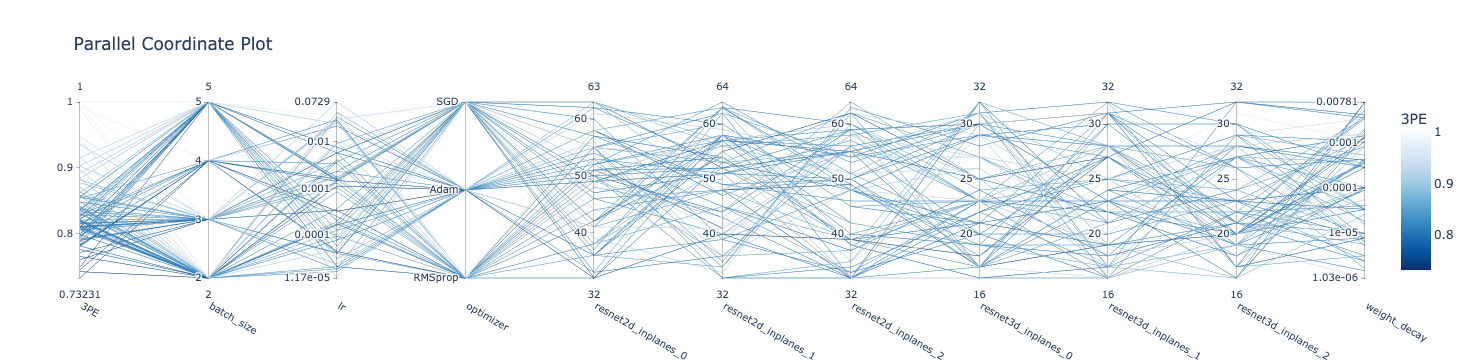

In [38]:
plot_parallel_coordinate(study, **three_pe_plot_kwargs)